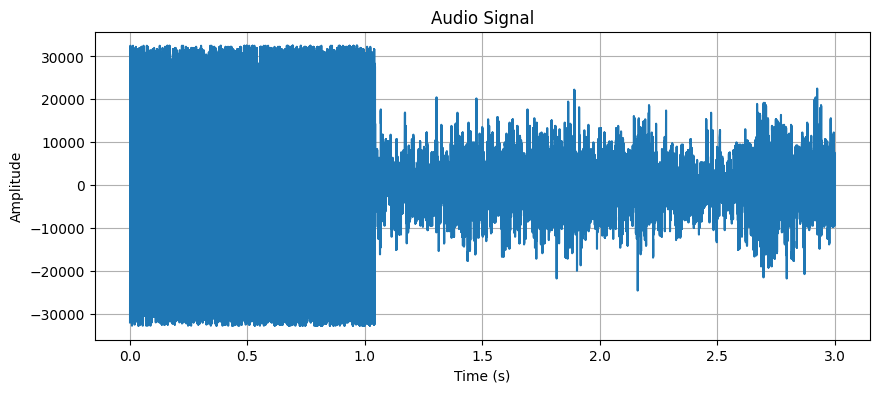

In [18]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import wave
import struct

SERIAL_PORT = '/dev/cu.usbserial-565C0062681'  # Remplacez '/dev/cu.usbserial-565C0062681' par le port série approprié sur votre système
BAUD_RATE = 115200
DURATION_SECONDS = 3  # Durée d'enregistrement en secondes
SAMPLING_RATE = 8000  # Taux d'échantillonnage, ajustez-le en fonction de la configuration de votre ESP32

def read_serial_data(duration_seconds):
    ser = serial.Serial(SERIAL_PORT, BAUD_RATE)
    num_samples = int(duration_seconds * SAMPLING_RATE)

    signal_data = []
    for _ in range(num_samples):
        data = ser.read(2)  # Lire 2 octets (16 bits)
        value = struct.unpack('h', data)[0]  # Convertir les octets en entier signé (short)
        signal_data.append(value)

    ser.close()
    return signal_data


def normalize_to_16_bits(signal_data):
    max_value = max(signal_data)
    min_value = min(signal_data)
    max_abs_value = max(abs(max_value), abs(min_value))
    normalization_factor = 32767 / max_abs_value

    normalized_data = [int(sample * normalization_factor) for sample in signal_data]
    return normalized_data

def plot_audio_signal(signal_data):
    time = np.linspace(0, len(signal_data) / SAMPLING_RATE, len(signal_data))

    plt.figure(figsize=(10, 4))
    plt.plot(time, signal_data)
    plt.title("Audio Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

def save_to_wav(signal_data, filename):
    wav_file = wave.open(filename, 'wb')
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)  # 2 octets par échantillon (16 bits)
    wav_file.setframerate(SAMPLING_RATE)  # Taux d'échantillonnage (4000 Hz)
    wav_file.setcomptype('NONE', 'not compressed')

    for data in signal_data:
        wav_file.writeframes(struct.pack('h', data))  # 'h' pour signed short (16 bits)

    wav_file.close()

signal_data = read_serial_data(DURATION_SECONDS)
normalized_data = normalize_to_16_bits(signal_data)
plot_audio_signal(normalized_data)
save_to_wav(normalized_data, '2eme_partie_sinus.wav')
